In [1]:
import os

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from keras import layers
from tensorflow import keras
#
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2

import warnings
warnings.filterwarnings('ignore')


In [ ]:
import zipfile
dataPath = 'archive.zip'
zip = zipfile.ZipFile(dataPath, mode='r')
zip.extractall()

In [3]:
dataset = '/content/drive/MyDrive/archive/traffic_Data/DATA'
nameFile = pd.read_csv("/content/drive/MyDrive/archive/labels.csv")

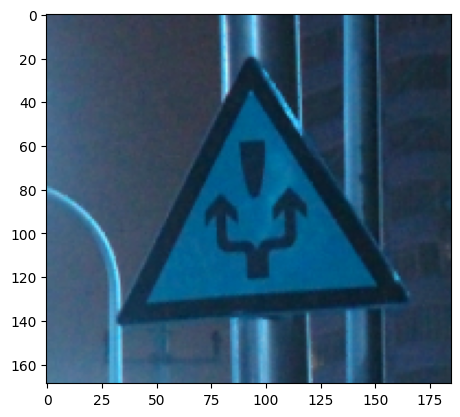

In [33]:
img = cv2.imread("/content/drive/MyDrive/archive/traffic_Data/DATA/32/032_1_0004.png")
plt.imshow(img)

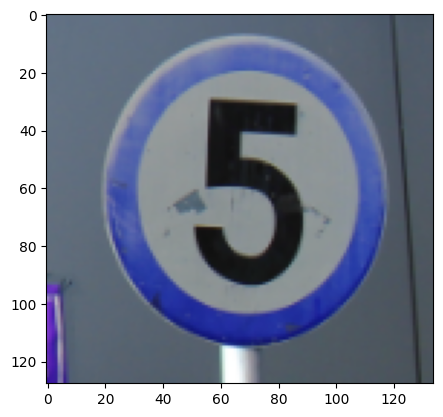

In [32]:
img = cv2.imread("/content/drive/MyDrive/archive/traffic_Data/DATA/0/000_0001.png")
plt.imshow(img)

In [5]:
nameFile.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [6]:
nameFile.tail()

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


In [7]:
nameFile.info

<bound method DataFrame.info of     ClassId                          Name
0         0           Speed limit (5km/h)
1         1          Speed limit (15km/h)
2         2          Speed limit (30km/h)
3         3          Speed limit (40km/h)
4         4          Speed limit (50km/h)
5         5          Speed limit (60km/h)
6         6          Speed limit (70km/h)
7         7          speed limit (80km/h)
8         8      Dont Go straight or left
9         9     Dont Go straight or Right
10       10              Dont Go straight
11       11                  Dont Go Left
12       12         Dont Go Left or Right
13       13                 Dont Go Right
14       14       Dont overtake from Left
15       15                      No Uturn
16       16                        No Car
17       17                       No horn
18       18          Speed limit (40km/h)
19       19          Speed limit (50km/h)
20       20          Go straight or right
21       21                   Go straight
22       22                       Go Left
23       23              Go Left or right
24       24                      Go Right
25       25                     keep Left
26       26                    keep Right
27       27          Roundabout mandatory
28       28            watch out for cars
29       29                          Horn
30       30             Bicycles crossing
31       31                         Uturn
32       32                  Road Divider
33       33               Traffic signals
34       34                  Danger Ahead
35       35                Zebra Crossing
36       36             Bicycles crossing
37       37             Children crossing
38       38   Dangerous curve to the left
39       39  Dangerous curve to the right
40       40                      Unknown1
41       41                      Unknown2
42       42                      Unknown3
43       43          Go right or straight
44       44           Go left or straight
45       45                      Unknown4
46       46                  ZigZag Curve
47       47                Train Crossing
48       48            Under Construction
49       49                      Unknown5
50       50                        Fences
51       51       Heavy Vehicle Accidents
52       52                      Unknown6
53       53                      Give Way
54       54                   No stopping
55       55                      No entry
56       56                      Unknown7
57       57                      Unknown8>

In [34]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                               subset='training',
                                                               image_size=(
                                                                   64,64),
                                                               seed=42,
                                                               batch_size=16)

Found 4170 files belonging to 58 classes.
Using 3336 files for training.


In [19]:
validation_data = tf.keras.preprocessing.image_dataset_from_directory(dataset, validation_split=0.2,
                                                             subset='validation',
                                                             image_size=(
                                                                 64, 64),
                                                             seed=42,
                                                             batch_size=16)

Found 2545 files belonging to 58 classes.
Using 509 files for validation.


In [20]:
class_numbers = training_data.class_names
print(f"Class names: {class_numbers}")

Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '6', '7', '8', '9']


In [22]:
class_names = []
for i in class_numbers:
    class_names.append(nameFile['Name'][int(i)])

In [23]:
print(class_names)

['Speed limit (5km/h)', 'Speed limit (15km/h)', 'Dont Go straight', 'Dont Go Left', 'Dont Go Left or Right', 'Dont Go Right', 'Dont overtake from Left', 'No Uturn', 'No Car', 'No horn', 'Speed limit (40km/h)', 'Speed limit (50km/h)', 'Speed limit (30km/h)', 'Go straight or right', 'Go straight', 'Go Left', 'Go Left or right', 'Go Right', 'keep Left', 'keep Right', 'Roundabout mandatory', 'watch out for cars', 'Horn', 'Speed limit (40km/h)', 'Bicycles crossing', 'Uturn', 'Road Divider', 'Traffic signals', 'Danger Ahead', 'Zebra Crossing', 'Bicycles crossing', 'Children crossing', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Speed limit (50km/h)', 'Unknown1', 'Unknown2', 'Unknown3', 'Go right or straight', 'Go left or straight', 'Unknown4', 'ZigZag Curve', 'Train Crossing', 'Under Construction', 'Unknown5', 'Speed limit (60km/h)', 'Fences', 'Heavy Vehicle Accidents', 'Unknown6', 'Give Way', 'No stopping', 'No entry', 'Unknown7', 'Unknown8', 'Speed limit (70km/h)', 'spe

In [24]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip(
            "horizontal", input_shape=(64, 64, 3)),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomFlip(
            mode="horizontal_and_vertical")
    ]
)

In [25]:
from tensorflow.keras.layers import Rescaling
model = Sequential()
model.add(data_augmentation)
model.add(Rescaling(1./255, input_shape=(64, 64, 3)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(len(nameFile), activation='softmax'))

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(training_data,
                 validation_data=validation_data,
                 epochs=30)

Epoch 1/30
128/128 [==============================] - 16s 117ms/step - loss: 0.8245 - accuracy: 0.7225 - val_loss: 0.8220 - val_accuracy: 0.6955
Epoch 2/30
128/128 [==============================] - 55s 428ms/step - loss: 0.8016 - accuracy: 0.7407 - val_loss: 0.6577 - val_accuracy: 0.7937
Epoch 3/30
128/128 [==============================] - 15s 111ms/step - loss: 0.7201 - accuracy: 0.7638 - val_loss: 0.5432 - val_accuracy: 0.8153
Epoch 4/30
128/128 [==============================] - 10s 77ms/step - loss: 0.6664 - accuracy: 0.7770 - val_loss: 0.4847 - val_accuracy: 0.8389
Epoch 5/30
128/128 [==============================] - 10s 71ms/step - loss: 0.6176 - accuracy: 0.7932 - val_loss: 0.4538 - val_accuracy: 0.8409
Epoch 6/30
128/128 [==============================] - 11s 82ms/step - loss: 0.6154 - accuracy: 0.8035 - val_loss: 0.5005 - val_accuracy: 0.8350
Epoch 7/30
128/128 [==============================] - 9s 63ms/step - loss: 0.5617 - accuracy: 0.8099 - val_loss: 0.5530 - val_accurac

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 64, 64, 3)         0         
                                                                 
 rescaling_1 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 62, 62, 128)       3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        73792     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                 

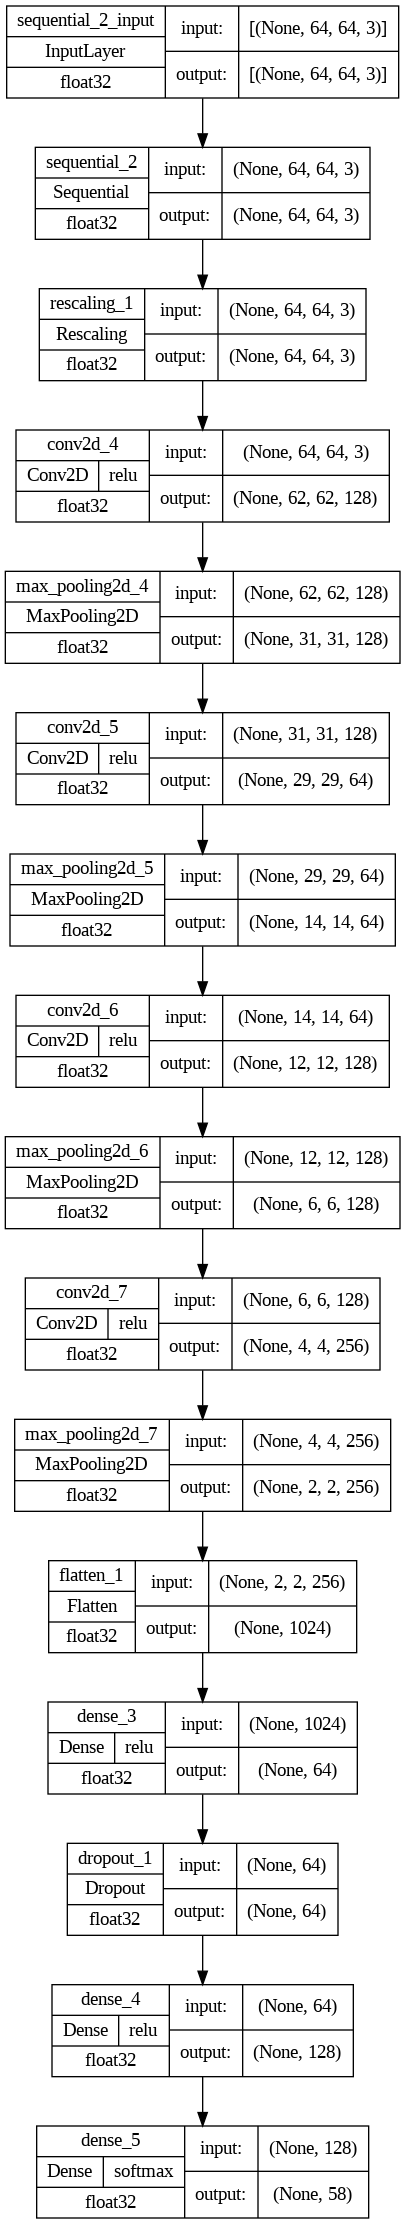

In [30]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)